In [1]:
import ps_utils
import os
from skimage.io import imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = r'C:\Users\tibor\Documents\semester 1\Vision and Image processing\assignments\assignment 3\DataAndCodeAssignment3'
filename ='Buddha'

In [35]:
I_buddha, mask_buddha, S_buddha = ps_utils.read_data_file(os.path.join(path,filename))

In [93]:
mask_buddha = mask_buddha.astype(int)
# int_array = float_array.astype(int)

In [94]:
mask_buddha.sum()

49737

In [4]:
S_buddha.shape[1]

3

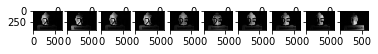

In [5]:
# show the 3 available images of the buddha
fig, axes = plt.subplots(1, S_buddha.shape[0])
ax = axes.ravel()

for i in range(S_buddha.shape[0]):
    ax[i].imshow(I_buddha[:,:,i],cmap = 'Greys_r')

# # images = data.stereo_motorcycle()
# ax[0].imshow(I_buddha[:,:,0],cmap = 'Greys_r')
# ax[1].imshow(I_buddha[:,:,1],cmap = 'Greys_r')
# ax[2].imshow(I_buddha[:,:,2],cmap = 'Greys_r')


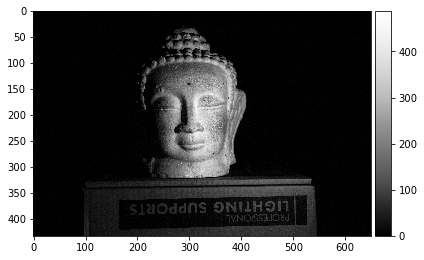

In [92]:
imshow(I_buddha[:,:,7],cmap = 'Greys_r')

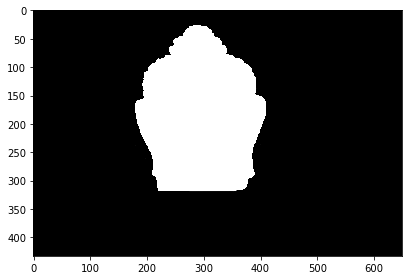

In [6]:
# show what is masked
imshow(mask_buddha, cmap = 'Greys_r')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


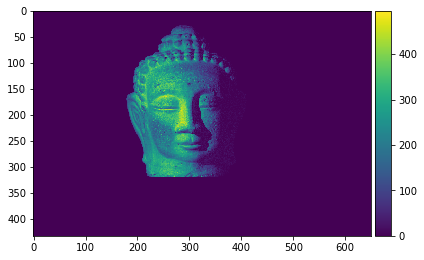

In [7]:
# show buddha clipped with the mask
imshow(mask_buddha * I_buddha[:,:,0])

In [8]:
mask_buddha_new = 1 - mask_buddha #take 1-mask so that the buddha is shown and not the background

In [34]:
mask_buddha.sum()

49758.637

In [24]:
# mask_buddha.count_nonzero()
np.count_nonzero(mask_buddha)

49872

In [28]:
for i in range(10):
    print(I_buddha.shape)

(433, 650, 10)
(433, 650, 10)
(433, 650, 10)
(433, 650, 10)
(433, 650, 10)
(433, 650, 10)
(433, 650, 10)
(433, 650, 10)
(433, 650, 10)
(433, 650, 10)


In [29]:
I_buddha.shape[2]

10

In [39]:
# np.count_nonzero(mask_buddha), np.count_nonzero(mask_buddha_new)

(49872, 231713)

In [50]:
# np.median(mask_buddha)

0.0

In [46]:
# import scipy.stats

AttributeError: module 'scipy.stats' has no attribute 'median'

In [52]:
# nr_of_cols = 433*650 -np.count_nonzero(mask_buddha_new) 

In [97]:
np.count_nonzero(mask_buddha) 

49737

In [38]:
# mask_buddha_new.shape, mask_buddha.shape

((433, 650), (433, 650))

In [95]:
nr_of_pictures = I_buddha.shape[2]

In [98]:
J = np.ndarray((nr_of_pictures,np.count_nonzero(mask_buddha) )) #create nd array with the the amount of non-zero cells
for i in range(nr_of_pictures):
    masked_I_buddha = np.ma.masked_array(I_buddha[:,:,i], mask=mask_buddha_new)
    compressed_I_buddha = masked_I_buddha.compressed()
    J[i] = compressed_I_buddha


In [99]:
J.shape

(10, 49737)

In [100]:
S_buddha.shape

(10, 3)

In [101]:
# get M= S^-1 J
S_buddha_inv = np.linalg.pinv(S_buddha) #take pseudo inverse
M = S_buddha_inv @J

In [102]:
M.shape

(3, 49737)

In [103]:
# With it(M), extract the albedo
# within the mask, display it as a 2D image.

In [104]:
# calculate albedo
norm_M_buddha = np.linalg.norm(M, axis = 0)
norm_M_buddha.shape
albedo_buddha = norm_M_buddha

In [105]:
mask_buddha.shape

(433, 650)

In [106]:
# convert back to image
# inspired by https://stackoverflow.com/questions/38855058/inverting-the-numpy-ma-compressed-operation
albedo_image_buddha = np.ndarray(mask_buddha.shape)
np.place(albedo_image_buddha,masked_I_buddha.mask,0)
np.place(albedo_image_buddha,~masked_I_buddha.mask,albedo_buddha)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


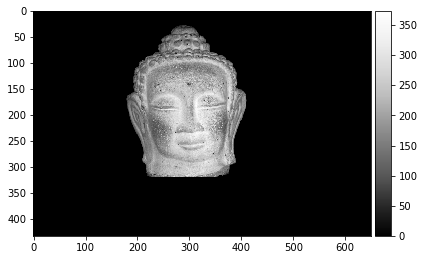

In [107]:
# display the albedo 
imshow(albedo_image_buddha,cmap = 'Greys_r')

In [108]:
# CALCULATE normal
normal = (1/albedo_buddha)*M

In [109]:
normal.shape

(3, 49737)

In [110]:
type(mask_buddha[0,0])

numpy.int32

In [111]:
n1,n2,n3 = normal #unpack to seperate variables

In [112]:
# convert back to 256x256 array
# inspired by https://stackoverflow.com/questions/38855058/inverting-the-numpy-ma-compressed-operation
norm1 = np.ndarray(mask_buddha.shape)
np.place(norm1,masked_I_buddha.mask,0)
np.place(norm1,~masked_I_buddha.mask,n1)


In [113]:
norm2 = np.ndarray(mask_buddha.shape)
np.place(norm2,masked_I_buddha.mask,0)
np.place(norm2,~masked_I_buddha.mask,n2)

In [114]:
norm3 = np.ndarray(mask_buddha.shape)
np.place(norm3,masked_I_buddha.mask,0)
np.place(norm3,~masked_I_buddha.mask,n3)

In [115]:
norm1.shape,norm2.shape,norm3.shape

((433, 650), (433, 650), (433, 650))

In [116]:
z_buddha = ps_utils.unbiased_integrate(norm1,norm2,norm3, mask_buddha)

In [118]:
ps_utils.display_surface(z_buddha, albedo=None)